<a href="https://colab.research.google.com/github/10mm-notebook/2023-2-Machine-Learning/blob/main/%EC%A3%BC%EC%B0%A8%EC%9E%A5_%EC%88%98%EC%9A%94_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,654 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121666 files and dire

In [ ]:
#importing libraries

import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns
import numpy as np
from sklearn import datasets
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
import math
import seaborn
from sklearn.linear_model import LassoCV, RidgeCV

In [ ]:
#드라이브에 접근
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#데이터 불러오기

df=pd.read_csv("/content/drive/MyDrive/train.csv")

In [ ]:
#간단한 탐색
df.head(100)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,C1312,518,아파트,충청남도,국민임대,39.98,89,12.0,A,17460000,122210,NaN,3.0,527.0,359.0
96,C1312,518,아파트,충청남도,국민임대,41.55,225,12.0,A,19954000,130940,NaN,3.0,527.0,359.0
97,C1312,518,아파트,충청남도,국민임대,46.90,143,12.0,A,28687000,149660,NaN,3.0,527.0,359.0
98,C1874,619,아파트,충청남도,영구임대,26.37,294,2.0,C,3141000,69900,NaN,2.0,97.0,62.0


In [ ]:
print(df.shape)

(2952, 15)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [ ]:
# '임대보증금'이 null인 샘플 찾기
null_samples = df[df['임대보증금'].isnull()]

null_samples.head(100)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
89,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
90,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,C2258,965,상가,대전광역시,임대상가,32.29,1,13.0,D,NaN,NaN,NaN,3.0,287.0,78.0
231,C2258,965,상가,대전광역시,임대상가,35.13,1,13.0,D,NaN,NaN,NaN,3.0,287.0,78.0
232,C2258,965,상가,대전광역시,임대상가,36.47,1,13.0,D,NaN,NaN,NaN,3.0,287.0,78.0
233,C2258,965,상가,대전광역시,임대상가,50.08,1,13.0,D,NaN,NaN,NaN,3.0,287.0,78.0


In [ ]:
# 임대보증금과 임대료는 '-'을 null로 바꾼 후 float로 타입 변경
df.loc[df.임대보증금=='-', '임대보증금'] = np.nan
df['임대보증금'] = df['임대보증금'].astype(float)

df.loc[df.임대료=='-', '임대료'] = np.nan
df['임대료'] = df['임대료'].astype(float)

In [ ]:
df[df.임대보증금.isnull()].공급유형.value_counts()

임대상가    562
국민임대      8
공공분양      7
행복주택      4
Name: 공급유형, dtype: int64

In [ ]:
# 임대보증금과 임대료가 NULL인 경우는 0으로 대체
df[['임대보증금', '임대료']] =df[['임대보증금', '임대료']].fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2952 non-null   float64
 10  임대료                           2952 non-null   float64
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [ ]:
# '도보 10분거리 내 지하철역 수(환승노선 수 반영)'이 null인 샘플 찾기
null_samples = df[df['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]

null_samples.head(100)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
94,C1312,518,아파트,충청남도,국민임대,39.72,60,12.0,A,17460000.0,122210.0,NaN,3.0,527.0,359.0
95,C1312,518,아파트,충청남도,국민임대,39.98,89,12.0,A,17460000.0,122210.0,NaN,3.0,527.0,359.0
96,C1312,518,아파트,충청남도,국민임대,41.55,225,12.0,A,19954000.0,130940.0,NaN,3.0,527.0,359.0
97,C1312,518,아파트,충청남도,국민임대,46.90,143,12.0,A,28687000.0,149660.0,NaN,3.0,527.0,359.0
98,C1874,619,아파트,충청남도,영구임대,26.37,294,2.0,C,3141000.0,69900.0,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,C2258,965,상가,대전광역시,임대상가,23.40,1,13.0,D,0.0,0.0,NaN,3.0,287.0,78.0
228,C2258,965,상가,대전광역시,임대상가,27.23,1,13.0,D,0.0,0.0,NaN,3.0,287.0,78.0
229,C2258,965,상가,대전광역시,임대상가,31.85,1,13.0,D,0.0,0.0,NaN,3.0,287.0,78.0
230,C2258,965,상가,대전광역시,임대상가,32.29,1,13.0,D,0.0,0.0,NaN,3.0,287.0,78.0


In [ ]:
# '지역' feature가 '충청남도'인 샘플만 선택
df_chungnam = df[df['지역'] == '충청남도']

# '도보 10분거리 내 지하철역 수(환승노선 수 반영)' feature의 값 분포를 확인
value_counts = df_chungnam['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].value_counts()

print(value_counts)

0.0    44
Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: int64


In [ ]:
# '지역' feature가 '대전광역시'인 샘플만 선택
df_daejeon = df[df['지역'] == '대전광역시']

# '도보 10분거리 내 지하철역 수(환승노선 수 반영)' feature의 값 분포를 확인
value_counts = df_daejeon['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].value_counts()

print(value_counts)

1.0    125
0.0     48
Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: int64


In [ ]:
# 도보 10분거리 내 지하철역 수(환승노선 수 반영)이 NULL인 경우는 0으로 대체
df[['도보 10분거리 내 지하철역 수(환승노선 수 반영)']] = df[['도보 10분거리 내 지하철역 수(환승노선 수 반영)']].fillna(0)

In [ ]:
df.info()

#남아있는 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2952 non-null   float64
 10  임대료                           2952 non-null   float64
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2952 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [ ]:
df = df.dropna(subset=['도보 10분거리 내 버스정류장 수'])
df.info()
#모든 결측치가 채워짐

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2948 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2948 non-null   object 
 1   총세대수                          2948 non-null   int64  
 2   임대건물구분                        2948 non-null   object 
 3   지역                            2948 non-null   object 
 4   공급유형                          2948 non-null   object 
 5   전용면적                          2948 non-null   float64
 6   전용면적별세대수                      2948 non-null   int64  
 7   공가수                           2948 non-null   float64
 8   자격유형                          2948 non-null   object 
 9   임대보증금                         2948 non-null   float64
 10  임대료                           2948 non-null   float64
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2948 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

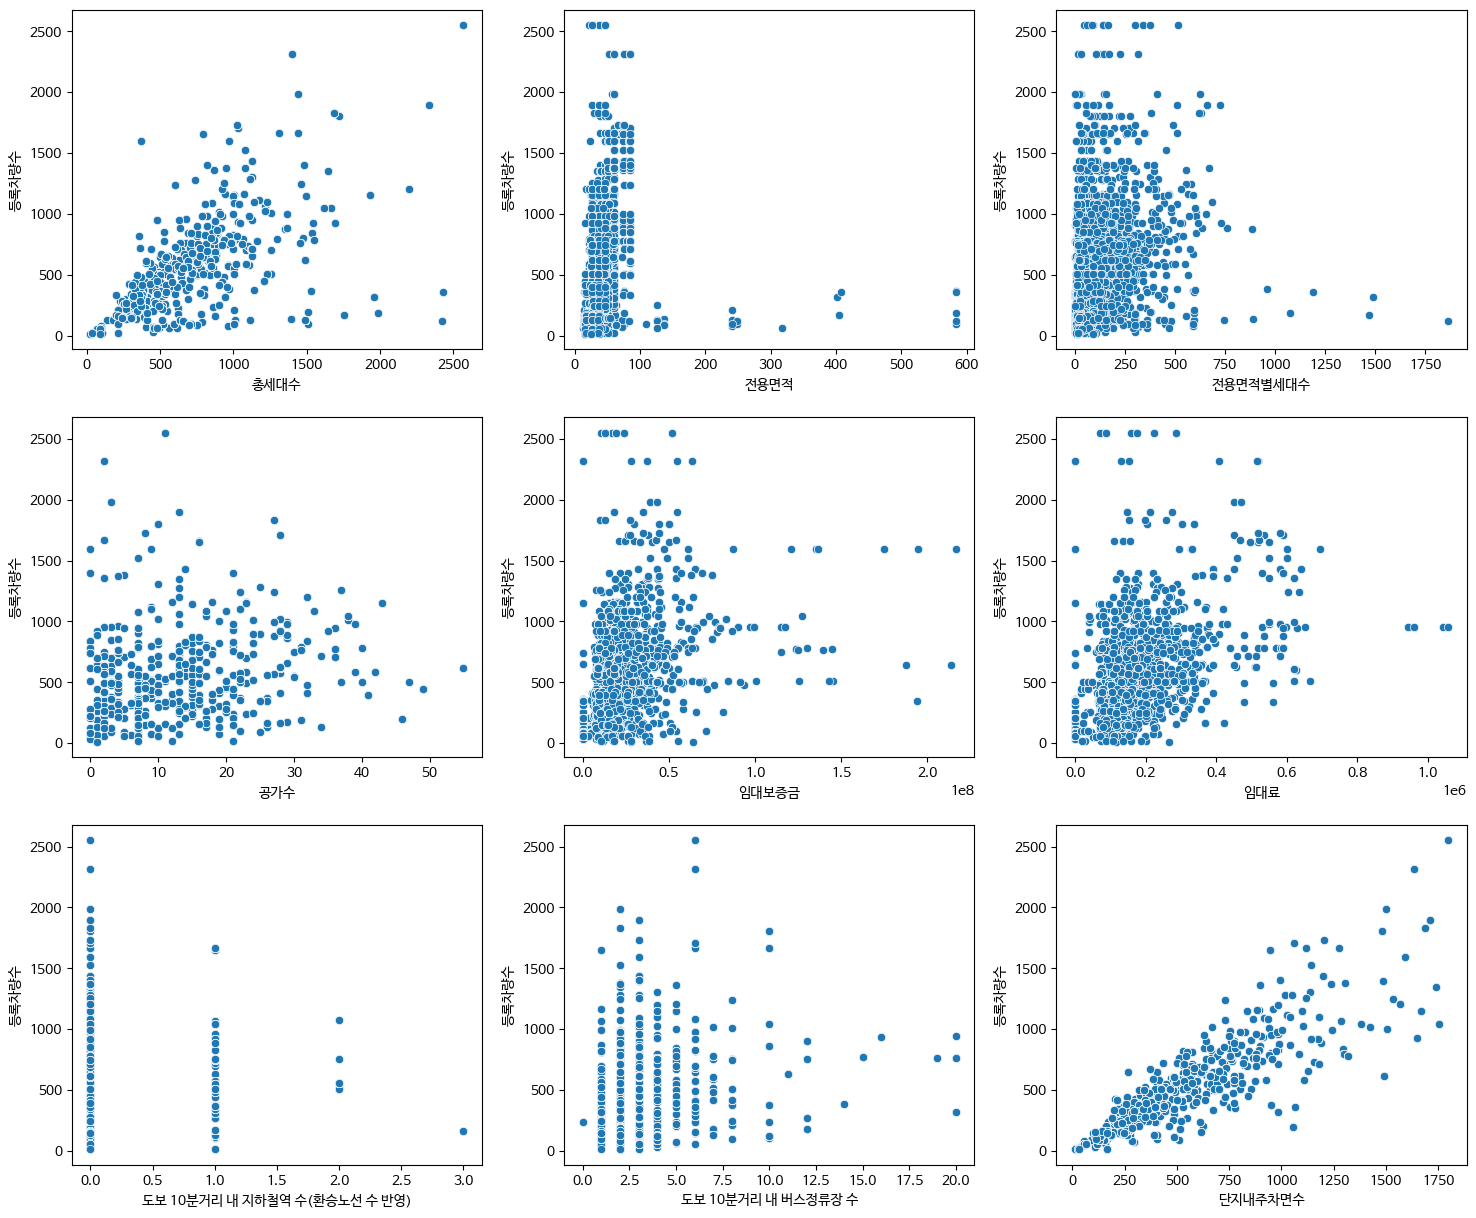

In [ ]:
# 데이터프레임 이름을 df라 가정하였습니다.
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
n = len(numeric_cols) - 1  # '등록차량수' 제외
n_cols = 3  # 한 행에 표시할 그래프 개수
n_rows = math.ceil(n / n_cols)  # 그래프를 그릴 행의 개수

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*5))  # 그래프 크기 조정

for idx, col in enumerate(numeric_cols):
    if col != '등록차량수':
        r, c = divmod(idx, n_cols)
        sns.scatterplot(data=df, x=col, y='등록차량수', ax=axes[r, c])


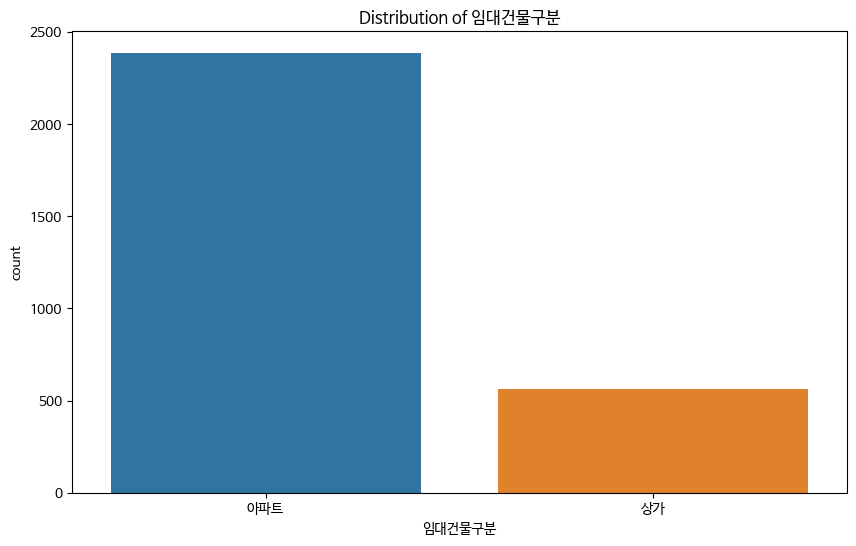

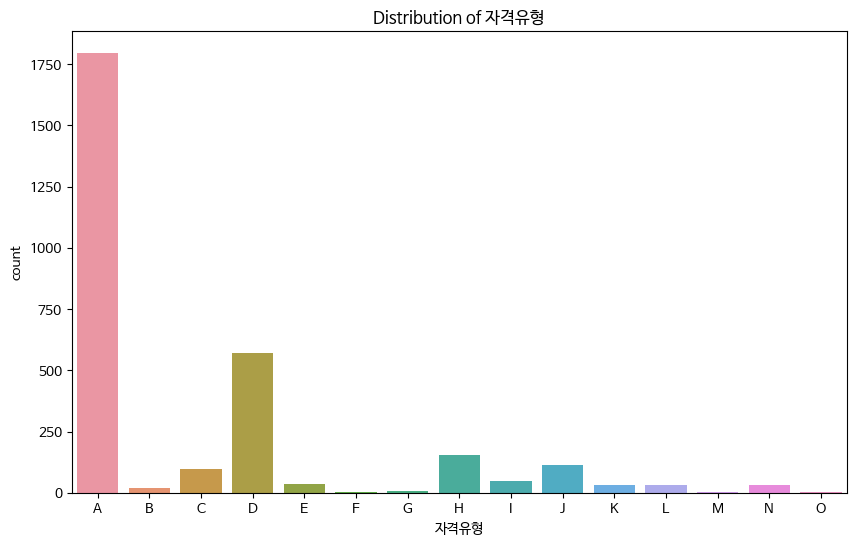

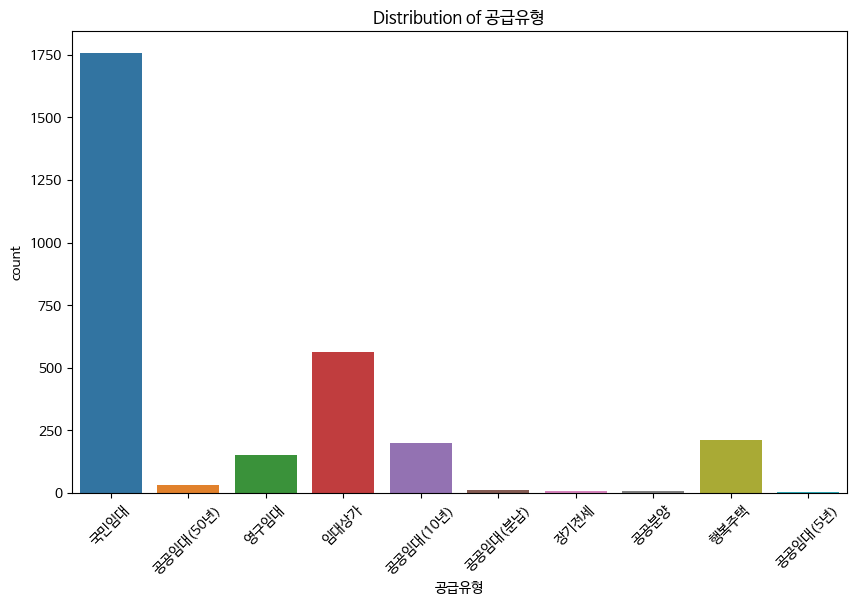

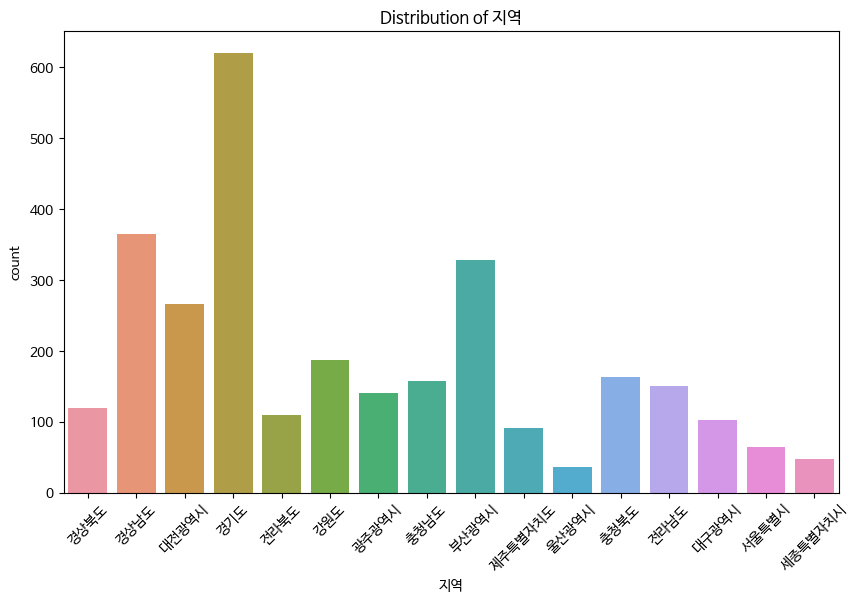

In [ ]:
#순서없는 범주형 feature들의 분포

#임대건물구분 분포도
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='임대건물구분')
plt.title('Distribution of 임대건물구분')
plt.show()

#자격유형 분포도
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='자격유형')
plt.title('Distribution of 자격유형')
plt.show()

#공급유형 구분 분포도
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='공급유형')
plt.xticks(rotation=45)
plt.title('Distribution of 공급유형')
plt.show()

#지역 분포도
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='지역')
plt.title('Distribution of 지역')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.shape,df.drop_duplicates().shape # 중복 존재

((2948, 15), (2628, 15))

In [ ]:
df=df.drop_duplicates() #중복되는 데이터 제거

In [ ]:
#원-핫 인코딩
one_hot = pd.get_dummies(df[['임대건물구분', '지역', '공급유형', '자격유형']])

# 원-핫 인코딩 결과를 기존 데이터 프레임에 추가
df_encoded = pd.concat([df, one_hot], axis=1)

# 원-핫 인코딩으로 변환된 변수를 제거
df_encoded = df_encoded.drop(columns=['임대건물구분', '지역', '공급유형', '자격유형'])

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2628 entries, 0 to 2951
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2628 non-null   object 
 1   총세대수                          2628 non-null   int64  
 2   전용면적                          2628 non-null   float64
 3   전용면적별세대수                      2628 non-null   int64  
 4   공가수                           2628 non-null   float64
 5   임대보증금                         2628 non-null   float64
 6   임대료                           2628 non-null   float64
 7   도보 10분거리 내 지하철역 수(환승노선 수 반영)  2628 non-null   float64
 8   도보 10분거리 내 버스정류장 수            2628 non-null   float64
 9   단지내주차면수                       2628 non-null   float64
 10  등록차량수                         2628 non-null   float64
 11  임대건물구분_상가                     2628 non-null   uint8  
 12  임대건물구분_아파트                    2628 non-null   uint8  
 13  지역_

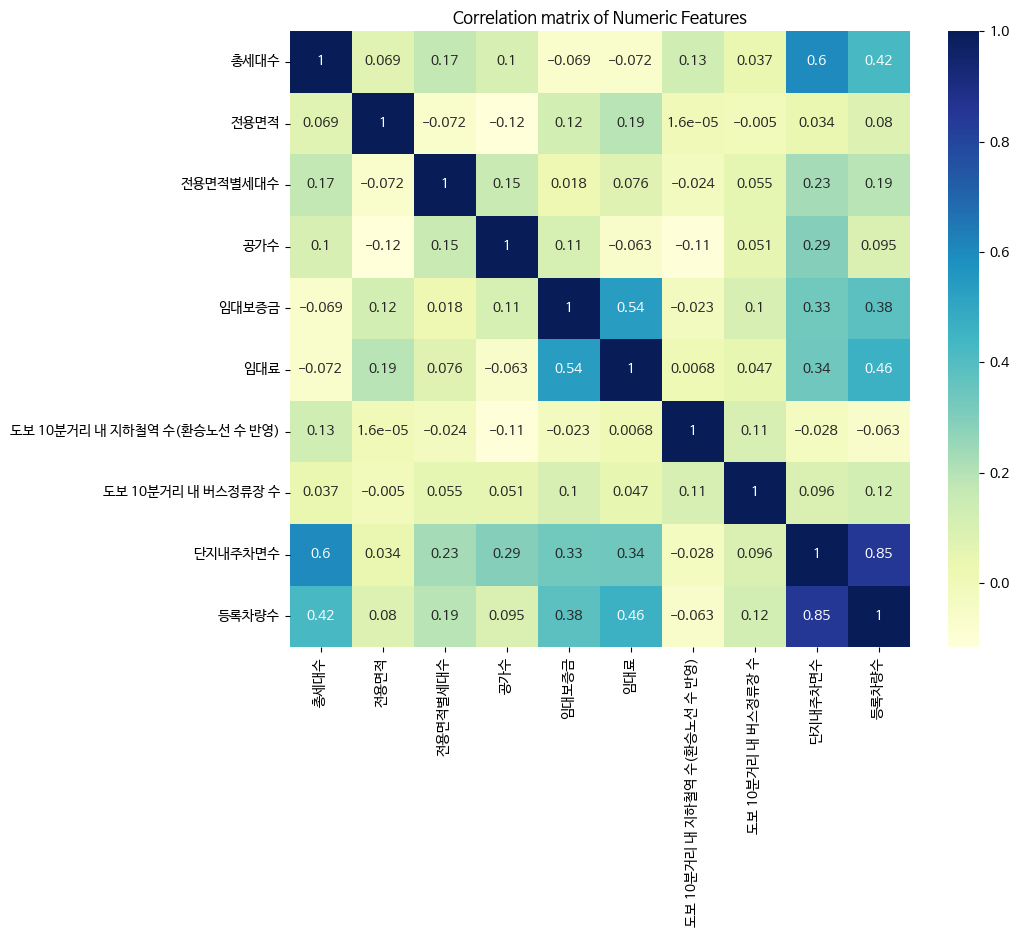

In [ ]:
# 수치형 변수 선택
numeric_cols = ['총세대수', '전용면적', '전용면적별세대수', '공가수','임대보증금','임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수']

# Correlation matrix 계산
corr_matrix = df_encoded[numeric_cols].corr()

# Heatmap으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation matrix of Numeric Features')
plt.show()


In [ ]:
# 1번째 실험
# 숫자형 데이터+원핫 인코딩 적용한 문자열 데이터를 이용해 학습시키는 방법입니다.
# '단지코드','단지내주차면수','등록차량수' 를 제외한 나머지 칼럼들을 feature로 설정, 예측 대상인 '등록차량수'를 target으로 설정
features = df_encoded.drop(['단지코드', '등록차량수'], axis=1)
target =df_encoded['등록차량수']

# 1. 데이터를 train과 test로 분리 (비율 8:2)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 2. train 데이터를 다시 train과 validation으로 분리 (비율 8:2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 회귀 모델들 준비
models = {
    "linear": LinearRegression(),
    "ridge": Ridge(alpha=0.05),
    "lasso": Lasso(alpha=0.01, max_iter=100000),
    "polynomial": LinearRegression()
}
results = {}

for model_name, model in models.items():
    # 모델 학습
    if model_name == "polynomial":
        model = make_pipeline(PolynomialFeatures(degree=2), model)
    model.fit(X_train, y_train)

    # train set 예측 및 평가
    train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, train_pred)

    # validation set 예측 및 평가
    val_pred = model.predict(X_val)
    val_r2 = r2_score(y_val, val_pred)

    # test set 예측 및 평가
    test_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, test_pred)

    # 결과 저장
    results[model_name] = {
        "Train R2": train_r2,
        "Validation R2": val_r2,
        "Test R2": test_r2
    }

# 결과 출력
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Train R2: {result['Train R2']}")
    print(f"Test R2: {result['Test R2']}")
    print(f"Validation R2: {result['Validation R2']}")
    print("-"*30)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.86916e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model: linear
Train R2: 0.8301085863636359
Test R2: 0.813653886674522
Validation R2: 0.8146990460088779
------------------------------
Model: ridge
Train R2: 0.830106044164186
Test R2: 0.8137810411060217
Validation R2: 0.8146781408044745
------------------------------
Model: lasso
Train R2: 0.8301011514884624
Test R2: 0.8138673255383059
Validation R2: 0.8146350901297017
------------------------------
Model: polynomial
Train R2: 0.9196957398548546
Test R2: -1.5331743752971452
Validation R2: 0.6769345885730698
------------------------------


In [ ]:
#2번째 실험
# 문자열데이터를 모두 사용하지 않고, 숫자형 데이터만을 이용해 학습시켰습니다.
# 'object' 데이터 타입인 칼럼들을 리스트에 저장

object_columns =df.select_dtypes(include=['object']).columns.tolist()

# 'object' 데이터 타입인 칼럼들과 target인 '등록차량수'를 제외한 나머지 칼럼을 feature로 사용
excluded_columns = object_columns + ['단지코드', '등록차량수','단지내주차면수']
features = df.drop(excluded_columns, axis=1)
target = df['등록차량수']


# 1. 데이터를 train과 test로 분리 (비율 8:2)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 2. train 데이터를 다시 train과 validation으로 분리 (비율 8:2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



# 회귀 모델들 준비
models = {
    "linear": LinearRegression(),
    "ridge": Ridge(alpha=0.1),
    "lasso": Lasso(alpha=0.01, max_iter=100000),
    "polynomial": LinearRegression()
}
results = {}

for model_name, model in models.items():
    # 모델 학습
    if model_name == "polynomial":
        model = make_pipeline(PolynomialFeatures(degree=2), model)
    model.fit(X_train, y_train)

    # train set 예측 및 평가
    train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, train_pred)

    # validation set 예측 및 평가
    val_pred = model.predict(X_val)
    val_r2 = r2_score(y_val, val_pred)

    # test set 예측 및 평가
    test_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, test_pred)

    # 결과 저장
    results[model_name] = {
        "Train R2": train_r2,
        "Validation R2": val_r2,
        "Test R2": test_r2
    }

# 결과 출력
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Train R2: {result['Train R2']}")
    print(f"Test R2: {result['Test R2']}")
    print(f"Validation R2: {result['Validation R2']}")
    print("-"*30)


Model: linear
Train R2: 0.4892711849472283
Test R2: 0.4794030174189262
Validation R2: 0.4322233759100397
------------------------------
Model: ridge
Train R2: 0.4892711829279245
Test R2: 0.47940543544958936
Validation R2: 0.4322201753583972
------------------------------
Model: lasso
Train R2: 0.48927118157708804
Test R2: 0.4794075753867425
Validation R2: 0.4322182714248124
------------------------------
Model: polynomial
Train R2: 0.6819294629409832
Test R2: 0.6789449151951528
Validation R2: 0.6482809188125742
------------------------------


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


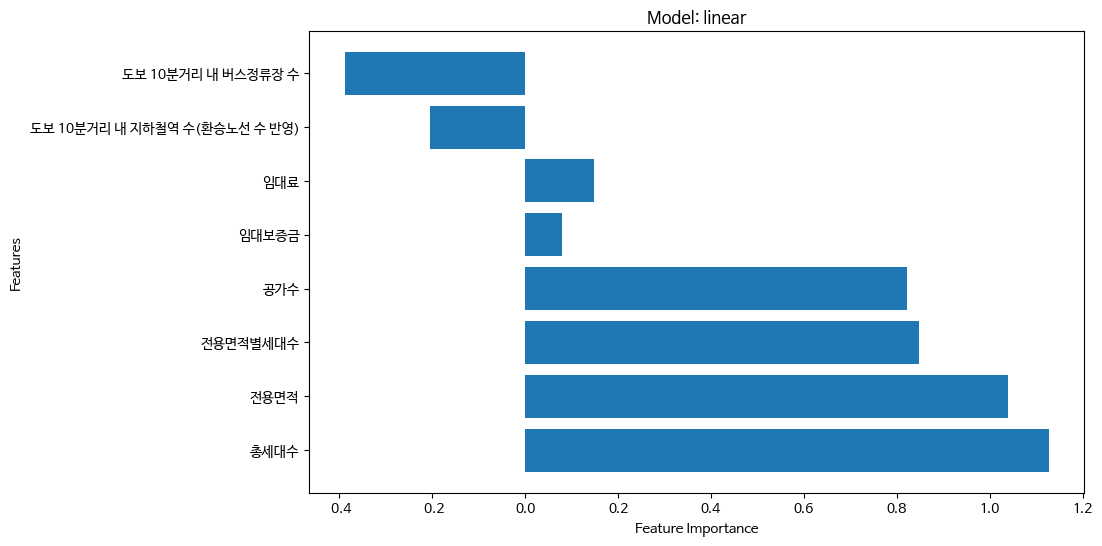

------------------------------


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


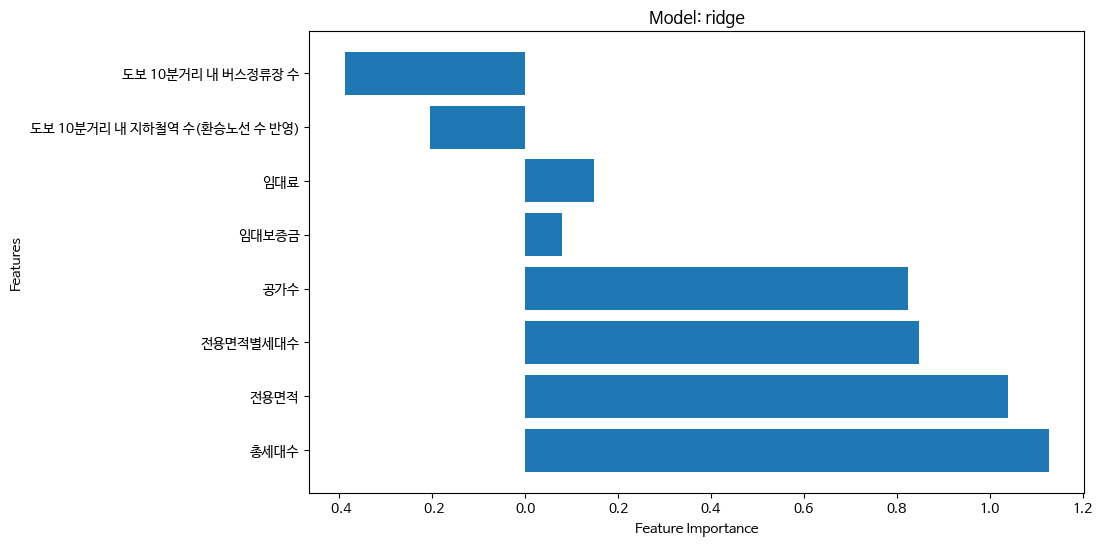

------------------------------


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


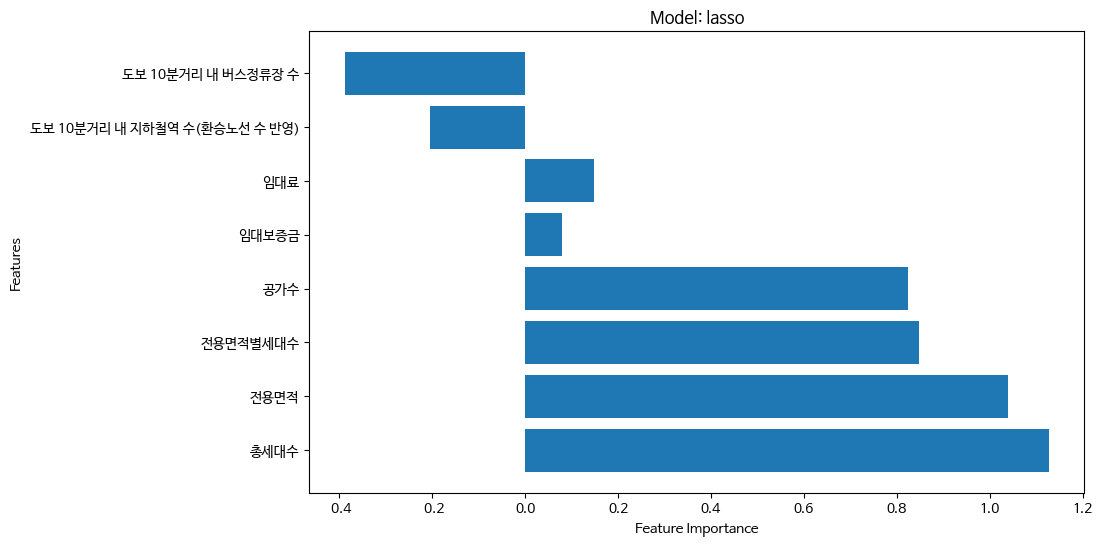

------------------------------
Model: polynomial does not have coef_ attribute
------------------------------


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

epsilon = 1e-10 # 0으로 나누는 것을 방지하기 위한 작은 값
scaler = MinMaxScaler() # 정규화를 위한 MinMaxScaler 객체 생성

for model_name, model in models.items():
    # 모델 학습
    if model_name == "polynomial":
        model = make_pipeline(PolynomialFeatures(degree=2), model)
    model.fit(X_train, y_train)

    try:
        # feature importance 추출
        feature_importance = model.coef_

        # feature importance의 역수 사용
        feature_importance = 1 / (np.abs(feature_importance) + epsilon)

        # feature importance 로그 스케일 변환
        feature_importance = np.log(feature_importance + epsilon)

        # feature importance의 역수 사용
        feature_importance = 1 / (feature_importance + epsilon)

        # feature importance 정규화
        #feature_importance = scaler.fit_transform(feature_importance.reshape(-1, 1)).flatten()

        # feature importance 로그 스케일 변환
        #feature_importance = np.log(feature_importance + epsilon)


        # feature importance 시각화
        plt.figure(figsize=(10,6))
        plt.barh(X_train.columns, feature_importance)
        plt.xlabel("Feature Importance")
        plt.ylabel("Features")
        plt.title(f"Model: {model_name}")
        plt.show()
    except AttributeError:
        # 모델이 coef_ 속성을 가지고 있지 않은 경우
        print(f"Model: {model_name} does not have coef_ attribute")
    print("-"*30)


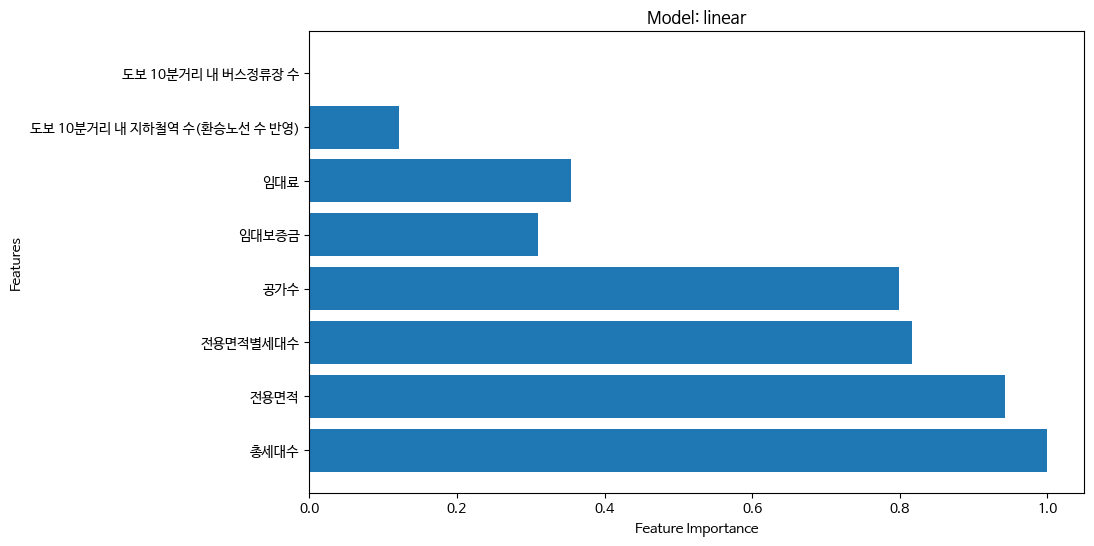

------------------------------


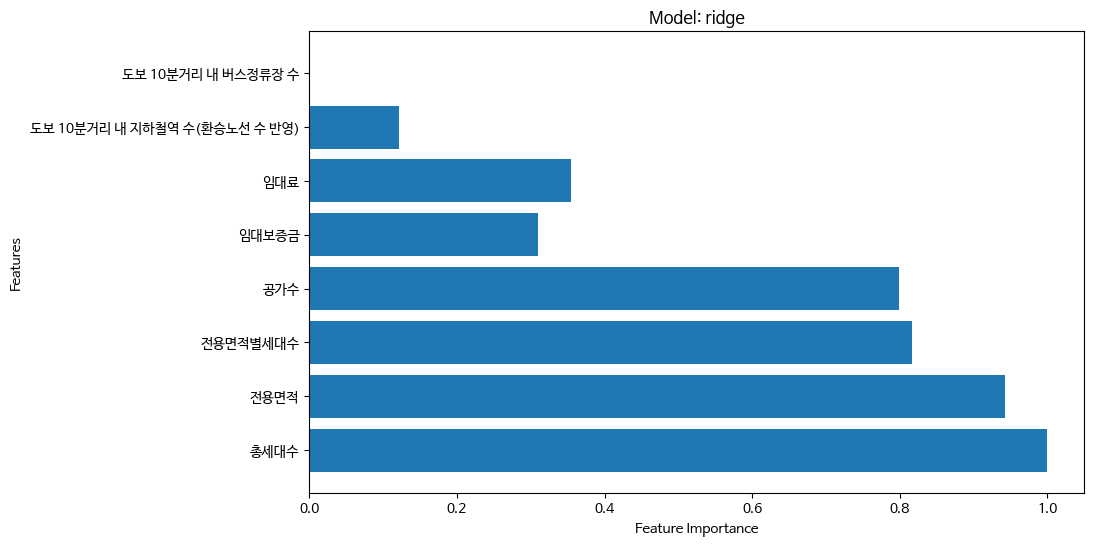

------------------------------


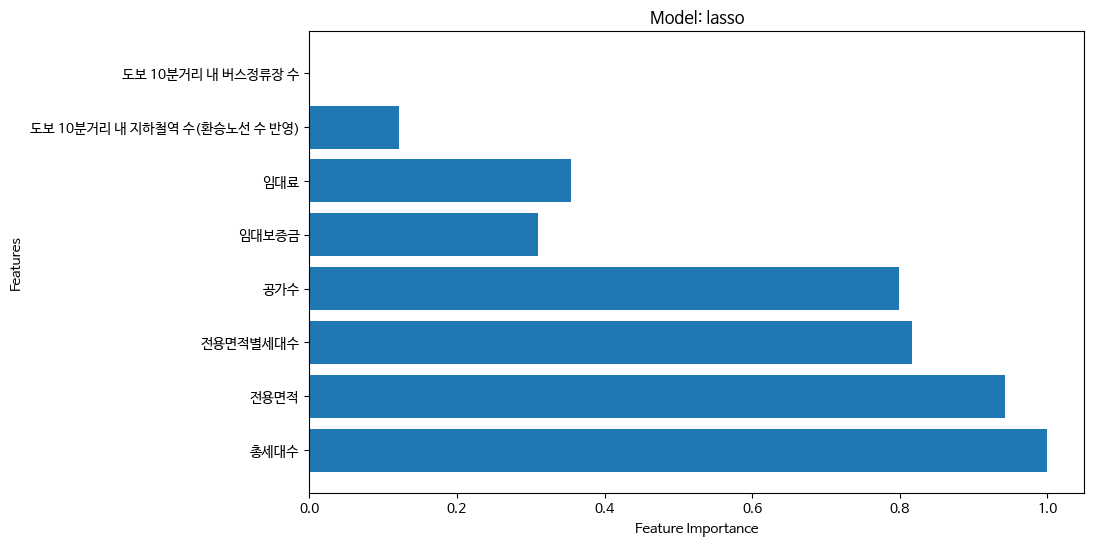

------------------------------
Model: polynomial does not have coef_ attribute
------------------------------


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

epsilon = 1e-10 # 0으로 나누는 것을 방지하기 위한 작은 값
scaler = MinMaxScaler() # 정규화를 위한 MinMaxScaler 객체 생성

for model_name, model in models.items():
    # 모델 학습
    if model_name == "polynomial":
        model = make_pipeline(PolynomialFeatures(degree=2), model)
    model.fit(X_train, y_train)

    try:
        # feature importance 추출
        feature_importance = model.coef_

        # feature importance의 역수 사용
        feature_importance = 1 / (np.abs(feature_importance) + epsilon)

        # feature importance 로그 스케일 변환
        feature_importance = np.log(feature_importance + epsilon)

        # feature importance의 역수 사용
        feature_importance = 1 / (feature_importance + epsilon)


        # feature importance 정규화
        feature_importance = scaler.fit_transform(feature_importance.reshape(-1, 1)).flatten()

        # feature importance 정규화
        #feature_importance = scaler.fit_transform(feature_importance.reshape(-1, 1)).reshape(-1)

        # feature importance 로그 스케일 변환
        #feature_importance = np.log(feature_importance + epsilon)


        # feature importance 시각화
        plt.figure(figsize=(10,6))
        plt.barh(X_train.columns, feature_importance)
        plt.xlabel("Feature Importance")
        plt.ylabel("Features")
        plt.title(f"Model: {model_name}")
        plt.show()
    except AttributeError:
        # 모델이 coef_ 속성을 가지고 있지 않은 경우
        print(f"Model: {model_name} does not have coef_ attribute")
    print("-"*30)


In [ ]:
#3번째 실험
#target과의 상관계수가 적었던 feature를 제외한 나머지 feature로 모델을 학습

features = df_encoded.drop(['단지코드', '등록차량수','도보 10분거리 내 지하철역 수(환승노선 수 반영)','도보 10분거리 내 버스정류장 수','전용면적'], axis=1)
target =df_encoded['등록차량수']

# 1. 데이터를 train과 test로 분리 (비율 8:2)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 2. train 데이터를 다시 train과 validation으로 분리 (비율 8:2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 회귀 모델들 준비
models = {
    "linear": LinearRegression(),
    "ridge": RidgeCV(alphas=np.logspace(-6, 6, 13)),
    "lasso": LassoCV(alphas=np.logspace(-6, 6, 13), max_iter=100000),
    "polynomial": LinearRegression()
}
results = {}

for model_name, model in models.items():
    # 모델 학습
    if model_name == "polynomial":
        model = make_pipeline(PolynomialFeatures(degree=2), model)
    model.fit(X_train, y_train)

    # train set 예측 및 평가
    train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, train_pred)

    # validation set 예측 및 평가
    val_pred = model.predict(X_val)
    val_r2 = r2_score(y_val, val_pred)

    # test set 예측 및 평가
    test_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, test_pred)

    # 결과 저장
    results[model_name] = {
        "Train R2": train_r2,
        "Validation R2": val_r2,
        "Test R2": test_r2
    }

    # 최적의 alpha 값 출력 (RidgeCV와 LassoCV만 해당)
    if model_name in ['ridge', 'lasso']:
        print(f"{model_name} alpha: {model.alpha_}")

# 결과 출력
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Train R2: {result['Train R2']}")
    print(f"Test R2: {result['Test R2']}")
    print(f"Validation R2: {result['Validation R2']}")
    print("-"*30)
    print("-"*30)

ridge alpha: 0.1
lasso alpha: 0.01
Model: linear
Train R2: 0.8268117323472324
Test R2: 0.8151107485740057
Validation R2: 0.8090773037477622
------------------------------
------------------------------
Model: ridge
Train R2: -630310.8551417536
Test R2: -654476.3719049084
Validation R2: -740226.9319602271
------------------------------
------------------------------
Model: lasso
Train R2: 0.8268042907481483
Test R2: 0.8153539839144349
Validation R2: 0.8090136866559698
------------------------------
------------------------------
Model: polynomial
Train R2: 0.9159937451572037
Test R2: 0.6294757386892396
Validation R2: 0.8658627913360543
------------------------------
------------------------------


In [ ]:
#4번째 실험
# target과의 상관계수가 적었던 feature, 문자열데이터를 모두 사용하지 않고, 숫자형 데이터만을 이용해 학습시킴

# 'object' 데이터 타입인 칼럼들을 리스트에 저장
object_columns =df.select_dtypes(include=['object']).columns.tolist()

# 'object' 데이터 타입인 칼럼들과 target인 '등록차량수','단지코드', target과의 상관계수가 적었던 feature를 제외한 나머지 칼럼을 feature로 사용
excluded_columns = object_columns + ['단지코드', '등록차량수','도보 10분거리 내 지하철역 수(환승노선 수 반영)','도보 10분거리 내 버스정류장 수','전용면적']
features = df.drop(excluded_columns, axis=1)
target = df['등록차량수']

# 1. 데이터를 train과 test로 분리 (비율 8:2)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 2. train 데이터를 다시 train과 validation으로 분리 (비율 8:2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 회귀 모델들 준비
models = {
    "linear": LinearRegression(),
    "ridge": Ridge(),
    "lasso": Lasso(),
    "polynomial": LinearRegression()
}
results = {}

for model_name, model in models.items():
    # 모델 학습
    if model_name == "polynomial":
        model = make_pipeline(PolynomialFeatures(degree=2), model)
    model.fit(X_train, y_train)

    # train set 예측 및 평가
    train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, train_pred)

    # validation set 예측 및 평가
    val_pred = model.predict(X_val)
    val_r2 = r2_score(y_val, val_pred)

    # test set 예측 및 평가
    test_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, test_pred)

    # 결과 저장
    results[model_name] = {
        "Train R2": train_r2,
        "Validation R2": val_r2,
        "Test R2": test_r2
    }

# 결과 출력
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Train R2: {result['Train R2']}")
    print(f"Test R2: {result['Test R2']}")
    print(f"Validation R2: {result['Validation R2']}")
    print("-"*30)